In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
campaign = pd.read_csv("Customer_campaign_details_p1.csv")
campaign.tail()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
37079,37080,cellular,nov,fri,334,1,999,0,nonexistent
37080,37081,cellular,nov,fri,383,1,999,0,nonexistent
37081,37082,cellular,nov,fri,189,2,999,0,nonexistent
37082,37083,cellular,nov,fri,442,1,999,0,nonexistent
37083,37084,cellular,nov,fri,239,3,999,1,failure


In [4]:
target = pd.read_csv("Customer_Response_data_P1.csv")
target.head()

,Customer_id,y
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [5]:
campaign_outcome = pd.merge(campaign, target, on='Customer_id', how='inner')
campaign_outcome.tail()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
37079,37080,cellular,nov,fri,334,1,999,0,nonexistent,yes
37080,37081,cellular,nov,fri,383,1,999,0,nonexistent,no
37081,37082,cellular,nov,fri,189,2,999,0,nonexistent,no
37082,37083,cellular,nov,fri,442,1,999,0,nonexistent,yes
37083,37084,cellular,nov,fri,239,3,999,1,failure,no


In [56]:
custDetails = pd.read_csv("Customer_and_bank details_p1.csv")
custDetails.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,C21
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,C21
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,C21
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,C49
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,C113


In [7]:
cust_outcome = pd.merge(custDetails, target, on='Customer_id', how='inner')
cust_outcome.reset_index(drop=True, inplace=True)
cust_outcome.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,y
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,C21,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,C21,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,C21,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,C49,yes
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,C113,no


<AxesSubplot:>

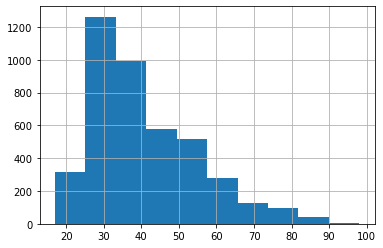

In [12]:
cust_outcome['age'][cust_outcome['y']=='yes'].hist()

In [32]:
cust_outcome['y'].value_counts()

no     32876
yes     4208
Name: y, dtype: int64

# Student's T-Test

In [33]:
ages=list(cust_outcome['age'][cust_outcome['y']=='yes'])
ages_mean = np.mean(ages)
print("Average age of turned out customers:", ages_mean)

Average age of turned out customers: 40.96292775665399


#### Null Hypothesis: The age of customers who opened bank account is 40: N0
#### Alternative Hypothesis: The age of customers who opened bank account is not 40: N1

In [38]:
from scipy.stats import ttest_1samp
age_samp = random.sample(ages, k=100)
tset, pval = ttest_1samp(age_samp, int(ages_mean))
print("p-values",pval)
alpha = 0.05
if pval < alpha:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we failed to reject null hypothesis")

p-values 0.17603479953187473
we failed to reject null hypothesis


#### Thus, the average age of customemers who opened bank account is 40years.

## Two Sample Z test
#### Null Hypothesis: The age of customers has nothing to do with whether they have taken a loan : N0
#### Alternative Hypothesis: The age of customers impacts whether they have taken a loan: N1

In [59]:
custDetails['loan'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [60]:
from scipy.stats import f_oneway
custDetails = custDetails[['age','loan']]
grps = pd.unique(custDetails.loan.values)
d_data = {grp:custDetails['age'][custDetails.loan == grp] for grp in grps}
 
F, p = f_oneway(d_data['yes'], d_data['no'], d_data['unknown'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

p-value for significance is:  0.36919463496155935
fail to reject null hypothesis


#### Thus, whether loan is taken by customer does not depend on age